## Observations and Insights 

#1. A correlation of 0.84 shows a positive correlation between average tumor volume and mouse weight in the experiments.
#2. Capomulin and Ramicane had the most data points out of all the drug regimens in the experiments. 
#3. Capomulin and Ramicane were the most successful drug regimens for reducing the size of the tumors during the experiments.
#as a quality check, I would recommend item 2 be limited to the same number of unique mice per drug regimen.  Using more mice could skew the results called out in item 3. I'd also find it interesting to see results based on same gender and same starting tumor volume.  That would be for another day though since I need to start the Python APIs homework soon and turn this one in.

In [243]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summary_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")
# Display the data table for preview
summary_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [244]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [245]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [246]:
summary_df["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

# Checking the number of mice.


In [247]:
mouse_count=len(summary_df["Mouse ID"].unique())

mouse_count

249

In [248]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = summary_df.loc[summary_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

duplicate_mouse

array(['g989'], dtype=object)

In [249]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = summary_df[summary_df["Mouse ID"] == "g989"]

duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [250]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=summary_df[summary_df["Mouse ID"].isin(duplicate_mouse) == False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [251]:
# Checking the number of mice in the clean DataFrame.
newmouse_count=len(clean_df["Mouse ID"].unique())
newmouse_count


248

In [252]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [253]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=summary_stats.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=summary_stats.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=summary_stats.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev=summary_stats.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM=summary_stats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

statistics_df=pd.DataFrame({"Tumor Volume mean":mean,"Tumor Volume median":median,"Tumor Volume variance":variance,
                            "Tumor Volume std deviation":std_dev, "Tumor Volume SEM":SEM})

# Formatting
statistics_df=statistics_df.round(2)

statistics_df


,Tumor Volume mean,Tumor Volume median,Tumor Volume variance,Tumor Volume std deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [254]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleanagg_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

# Formatting
cleanagg_df=cleanagg_df.round(2)

cleanagg_df

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

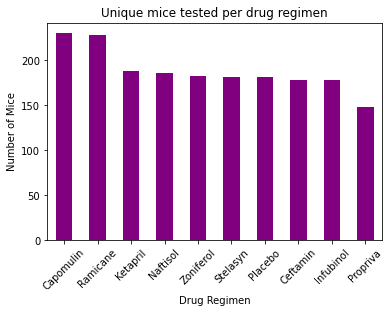

In [255]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mousebydrug_count = clean_df["Drug Regimen"].value_counts()

ax = mousebydrug_count.plot(kind="bar", facecolor="purple",rot=45, title="Unique mice tested per drug regimen")

ax.set(xlabel="Drug Regimen",ylabel="Number of Mice")
mousebydrug_count

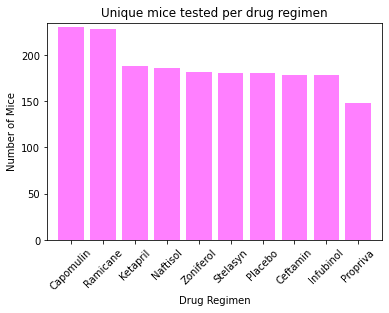

In [256]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(mousebydrug_count))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(mousebydrug_count.index), rotation=45)

plt.bar(x_axis, mousebydrug_count, color="magenta", alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(mousebydrug_count)+5)

plt.title("Unique mice tested per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [257]:
#reminder for column headers
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [258]:
#Break out data by gender and get count of each
gender_df = clean_df.groupby(["Mouse ID","Sex"])
gender_df

mouse_gender_df = pd.DataFrame(gender_df.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Counts"]

#gender percentage
mouse_gender["Percentage of each"] = (100*(mouse_gender["Counts"]/mouse_gender["Counts"].sum()))

mouse_gender


,Counts,Percentage of each
Sex,,
Female,123,49.596774
Male,125,50.403226


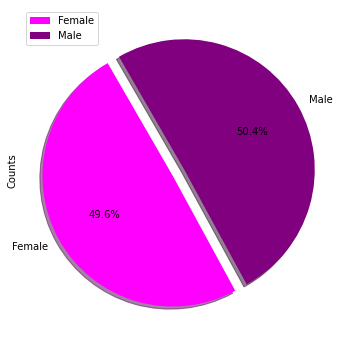

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["magenta", "purple"]
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y="Counts",figsize=(6,6), colors = colors, startangle=120, explode = explode, shadow = True, 
                             autopct="%1.1f%%")


(-1.227640229538968,
 1.1150735620110068,
 -1.1871615012756211,
 1.1132828173734097)

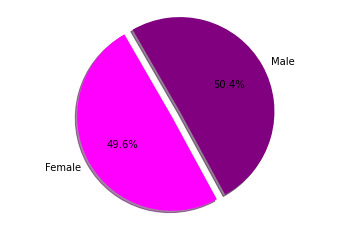

In [260]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
colors = ["magenta","purple"]
explode = (0.1, 0)

plt.pie((mouse_gender["Percentage of each"]), explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,
        startangle=120)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [261]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_last = four_regimens.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"]
four_drugs = pd.DataFrame(four_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_merge = pd.merge(four_drugs, clean_df, on=("Mouse ID","Timepoint"),how="left")
four_merge.head


<bound method NDFrame.head of    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
..      ...        ...          ...     ...         ...         ...   
95     s508         45     Ramicane    Male           1          17   
96     u196         45     Ramicane    Male          18          25   
97     w678          5     Ramicane  Female           5          24   
98     y449         15     Ramicane    Male          19          24   
99     z578         45     Ramicane    Male          11          16   

    Tumor Volume (mm3)  Metastatic Sites  
0            38.982878                 2  
1            38.939633         

In [262]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_regimens_data = four_merge[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
four_regimens_data


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [263]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumors = four_regimens_data["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
   

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 


In [264]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# Create empty list to fill with tumor vol data (for plotting)
# Put treatments into a list for for loop (and later for plot labels)

four_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_df = four_regimens_data.reset_index()
tumor_lists = tumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)

tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(four_drugs)

tumor_list_df

tumor_vols = [vol for vol in tumor_list_df["Tumor Volume (mm3)"]]
      

In [265]:
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


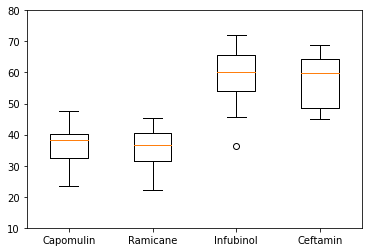

In [266]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=four_drugs)
plt.ylim(10, 80)
plt.show() 

In [267]:
#reminder for column headers
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Line and Scatter Plots

In [268]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = four_regimens_data.loc[four_regimens_data["Mouse ID"] == "b128",:]
line_df.head()


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878


,Mouse ID,Timepoint,Tumor Volume (mm3)
300,b128,0,45.000000
301,b128,5,45.651331
302,b128,10,43.270852
303,b128,15,43.784893
304,b128,20,42.731552
305,b128,25,43.262145
306,b128,30,40.605335
307,b128,35,37.967644
308,b128,40,38.379726
309,b128,45,38.982878


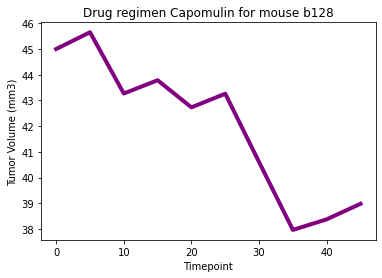

In [269]:
vol_time = clean_df[clean_df["Mouse ID"].isin(["b128"])]

vol_time_data = vol_time[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

plt.plot(vol_time_data["Timepoint"], vol_time_data["Tumor Volume (mm3)"],linewidth=4, color="purple")
plt.title("Drug regimen Capomulin for mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

vol_time_data

Text(0, 0.5, 'Average Tumor Volume (mm3)')

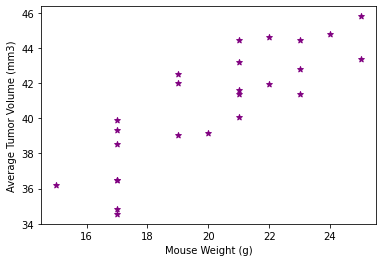

In [270]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol_weight = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
volavg_weight = vol_weight.groupby(["Mouse ID"]).mean()

plt.scatter(volavg_weight["Weight (g)"],volavg_weight["Tumor Volume (mm3)"],color="purple", marker="*")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

In [271]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coeff=round(st.pearsonr(volavg_weight["Weight (g)"],volavg_weight["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {coeff}")

The correlation between mouse weight and average tumor volume is 0.84


In [272]:
model=st.linregress(volavg_weight["Weight (g)"],volavg_weight["Tumor Volume (mm3)"])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

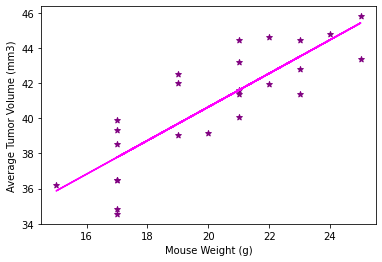

In [273]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = volavg_weight["Weight (g)"]*mslope+bintercept
plt.scatter(volavg_weight["Weight (g)"],volavg_weight["Tumor Volume (mm3)"],color="purple", marker="*")
plt.plot(volavg_weight["Weight (g)"],y_values,color="magenta")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
